In [58]:
%matplotlib inline
import scipy.stats #stats
import numpy as np
import pandas as pd # dataframe
import seaborn as sns # plotting
sns.set(style="ticks")

In [59]:
dists = ['uniform', 'norm', 'lognorm', 'expon', 'beta',
         'powerlaw', 'bradford', 'burr', 'fisk', 'cauchy', 'halfcauchy',
         'foldcauchy', 'gamma', 'gengamma', 'loggamma',
         'alpha', 'anglit', 'arcsine', 'betaprime', 'dgamma',
         'exponnorm', 'exponweib', 'exponpow', 'frechet_l', 'frechet_r',
         'gilbrat', 'f', 'ncf', 'chi2', 'chi', 'nakagami', 'genpareto',
         'genextreme', 'genhalflogistic', 'pareto', 'lomax', 'halfnorm',
         'halflogistic', 'fatiguelife', 'foldnorm', 'ncx2', 't', 'nct',
         'weibull_min', 'weibull_max', 'dweibull', 'maxwell', 'rayleigh',
         'genlogistic', 'logistic', 'gumbel_l', 'gumbel_r', 'gompertz',
         'hypsecant', 'laplace', 'reciprocal', 'trapz', 'triang', 'tukeylambda',
         'vonmises', 'vonmises_line', 'pearson3', 'gennorm', 'halfgennorm',
         'rice', 'kappa4', 'kappa3', 'truncnorm']


In [60]:
len(dists)

68

In [61]:
cytokines = pd.read_csv("../data/Nelly_cytokine_data_cast.csv", header=0, sep=",")

In [83]:
cytokines

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
0,0.00,0.00,407.55,34.01,0.00,1182.39,52,12854.94,25460.34,198.49,...,2.29,34.16,0,24.64,33.78,60.65,4013.29,55.22,38.90,29.63
1,0.00,164.65,190.30,294.21,0.00,4854.15,399,15484.07,10110.55,5332.88,...,2.29,34.16,0,24.64,33.78,76.21,3984.62,94.92,38.90,29.63
2,4.36,9.95,25.01,25.50,0.00,918.03,158,4153.73,6037.95,602.40,...,2.29,34.16,0,24.64,33.78,64.53,4070.76,1.19,38.90,29.63
3,0.00,0.00,48.22,243.46,0.69,1477.38,124,19789.61,11631.42,5421.80,...,6.69,12.26,0,41.15,34.50,221.81,4433.17,38.40,3158.78,24.06
4,0.00,305.57,130.76,254.47,0.74,4194.74,438,12298.07,11077.57,2834.02,...,8.80,12.26,0,41.15,34.50,225.47,4463.60,38.40,3158.78,23.83
5,0.00,0.00,47.89,142.92,0.69,1258.32,160,6626.16,7425.26,434.36,...,6.69,12.26,0,41.15,34.50,30.78,4463.60,38.40,3214.93,22.66
6,0.00,0.00,76.19,108.51,0.90,1282.92,91,11354.70,17715.49,176.05,...,10.47,44.86,0,35.37,1647.81,96.39,2202.69,501.77,2301.86,30.39
7,0.00,99.55,107.98,1059.35,8.04,5273.38,1148,14712.12,11544.06,803.74,...,6.13,42.81,113,35.37,1469.93,80.64,2088.37,541.26,2301.86,28.56
8,0.00,14.93,114.76,505.02,1.75,1465.32,540,11340.59,9655.79,466.16,...,7.82,43.71,50,35.37,1486.21,95.31,2088.37,521.73,2344.08,29.39
9,7.07,0.00,544.14,342.78,0.87,4491.08,344,34921.28,46809.83,1240.92,...,25.62,22.58,56,0.86,34.53,246.19,3725.17,2184.39,2804.19,28.75


In [63]:
cytokines.drop(['Unnamed: 0','Site', 'Sample', 'Group', 'SEX', 'GEST_AGE', 'DELIVERY', 'MOM_AGE'], axis=1, inplace=True)

In [64]:
cytokines.head()

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
0,0.00,0.00,407.55,34.01,0.00,1182.39,52,12854.94,25460.34,198.49,...,2.29,34.16,0,24.64,33.78,60.65,4013.29,55.22,38.90,29.63
1,0.00,164.65,190.30,294.21,0.00,4854.15,399,15484.07,10110.55,5332.88,...,2.29,34.16,0,24.64,33.78,76.21,3984.62,94.92,38.90,29.63
2,4.36,9.95,25.01,25.50,0.00,918.03,158,4153.73,6037.95,602.40,...,2.29,34.16,0,24.64,33.78,64.53,4070.76,1.19,38.90,29.63
3,0.00,0.00,48.22,243.46,0.69,1477.38,124,19789.61,11631.42,5421.80,...,6.69,12.26,0,41.15,34.50,221.81,4433.17,38.40,3158.78,24.06
4,0.00,305.57,130.76,254.47,0.74,4194.74,438,12298.07,11077.57,2834.02,...,8.80,12.26,0,41.15,34.50,225.47,4463.60,38.40,3158.78,23.83


In [65]:
# drop NAs

print "Before removing NAs : size "+str(cytokines.shape)

cytokines_no_nas = cytokines.dropna()

print "After removing NAs : size "+str(cytokines_no_nas.shape)


Before removing NAs : size (36, 98)
After removing NAs : size (35, 98)


In [66]:
samples = list(cytokines_no_nas) # Get all the cytokines labels in a list
#print samples
#sample = cytokines['LPS_IL-12p40']
results = pd.DataFrame(columns=('Sample', 'Distribution', 'Pvalue', 'D value'))

In [67]:
i = 0
for sample in samples:
    max = 0
    data = cytokines_no_nas[sample]
    selected_dist = None
    prob = None
    distance = None
    for dist in dists:
        #print dist+"-----"+sample
        #fit our data set against every probability distribution
        parameters = eval("scipy.stats."+dist+".fit(data)")
        #Applying the Kolmogorov-Smirnof one sided test
        # The bigger the pvalue the more we reject the hypothesis that the data 
        D, p = scipy.stats.kstest(data, dist, args=parameters)
        #pretty-print the results
        #print dist.ljust(16) + ("p: "+str(p)).ljust(25)+"D: "+str(D);
        if p > max:
            selected_dist = dist
            prob = p
            distance = D
            max = p
    results.loc[i] = [sample, selected_dist, prob, distance]
    i+=1

In [68]:
results.head() # Checking how the results look like

,Sample,Distribution,Pvalue,D value
0,LPS_IFNa2,ncf,0.006142,0.281062
1,LPS_IFNg,vonmises_line,0.225602,0.171816
2,LPS_IL-10,fatiguelife,0.988897,0.075225
3,LPS_IL-12p40,pareto,0.908780,0.095225
4,LPS_IL-12p70,alpha,0.061375,0.217868


In [69]:
def set_tick_label_rotations(ax):
    for t in ax.get_xticklabels():
        t.set_rotation(90)


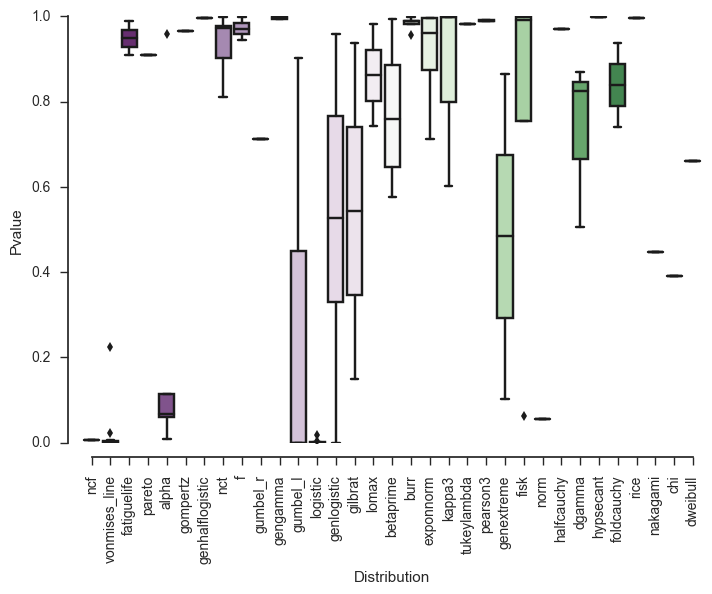

In [70]:
ax = sns.boxplot(x="Distribution", y="Pvalue", data=results, palette="PRGn")
sns.despine(offset=10, trim=True)
set_tick_label_rotations(ax)

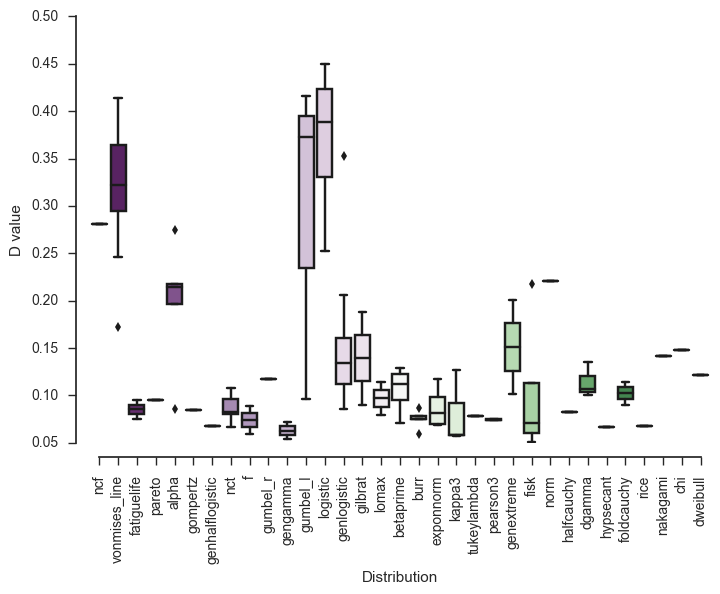

In [71]:
ax = sns.boxplot(x="Distribution", y="D value", data=results, palette="PRGn")
sns.despine(offset=10, trim=True)
set_tick_label_rotations(ax)

In [72]:
# Normalize data

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


cytokines_normalized = cytokines_no_nas.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

normalized_df=(cytokines_no_nas-cytokines_no_nas.mean())/cytokines_no_nas.std()

norm_df = normalize(cytokines_no_nas)

In [73]:
cytokines_normalized.head()

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
1,-0.120959,-0.043515,-0.049477,-0.163649,-0.083640,0.016787,-0.174818,0.068757,-0.044046,0.189468,...,-0.386994,0.330073,-0.074336,-0.334979,-0.331856,-0.079361,0.291284,-0.443990,-0.313642,-0.022163
2,-0.089673,-0.089336,-0.132722,-0.263382,-0.083640,-0.238809,-0.322943,-0.223833,-0.113741,-0.242099,...,-0.386994,0.330073,-0.074336,-0.334979,-0.331856,-0.095377,0.309367,-0.472913,-0.313642,-0.022163
3,-0.120959,-0.092283,-0.121033,-0.182485,-0.072748,-0.202487,-0.343841,0.179941,-0.018019,0.197580,...,-0.198396,-0.187047,-0.074336,-0.329752,-0.331465,0.120285,0.385449,-0.461431,0.158468,-0.125580
4,-0.120959,-0.001776,-0.079463,-0.178399,-0.071959,-0.026032,-0.150847,-0.013517,-0.027497,-0.038506,...,-0.107954,-0.187047,-0.074336,-0.329752,-0.331465,0.125304,0.391837,-0.461431,0.158468,-0.129850
5,-0.120959,-0.092283,-0.121199,-0.219801,-0.072748,-0.216712,-0.321714,-0.159986,-0.090000,-0.257429,...,-0.198396,-0.187047,-0.074336,-0.329752,-0.331465,-0.141654,0.391837,-0.461431,0.166965,-0.151573


In [74]:
normalized_df.head()

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
1,-0.528965,-0.220599,-0.270740,-0.620172,-0.460579,0.076335,-0.654268,0.285777,-0.194591,0.726125,...,-1.558560,1.005877,-0.373791,-0.793969,-0.828171,-0.458163,0.927715,-1.467635,-1.337028,-0.075946
2,-0.392149,-0.452887,-0.726268,-0.998124,-0.460579,-1.085933,-1.208638,-0.930333,-0.502498,-0.927829,...,-1.558560,1.005877,-0.373791,-0.793969,-0.828171,-0.550624,0.985309,-1.563242,-1.337028,-0.075946
3,-0.528965,-0.467827,-0.662303,-0.691554,-0.400600,-0.920767,-1.286848,0.747900,-0.079606,0.757215,...,-0.799009,-0.570014,-0.373791,-0.781581,-0.827195,0.694426,1.227624,-1.525287,0.675535,-0.430320
4,-0.528965,-0.009002,-0.434828,-0.676068,-0.396254,-0.118377,-0.564557,-0.056183,-0.121479,-0.147571,...,-0.434769,-0.570014,-0.373791,-0.781581,-0.827195,0.723399,1.247970,-1.525287,0.675535,-0.444953
5,-0.528965,-0.467827,-0.663212,-0.832968,-0.400600,-0.985451,-1.204038,-0.664961,-0.397611,-0.986582,...,-0.799009,-0.570014,-0.373791,-0.781581,-0.827195,-0.817793,1.247970,-1.525287,0.711756,-0.519391


In [75]:
norm_df.head()

,LPS_IFNa2,LPS_IFNg,LPS_IL-10,LPS_IL-12p40,LPS_IL-12p70,LPS_IL-1b,LPS_IL-23,LPS_IL-6,LPS_IL-8,LPS_IP-10,...,Unstim_IL-12p70,Unstim_IL-1b,Unstim_IL-23,Unstim_IL-6,Unstim_IL-8,Unstim_IP-10,Unstim_MDC,Unstim_MIP-1a,Unstim_MIP-1b,Unstim_TNFa
1,0.000000,0.048768,0.095162,0.109197,0.000000,0.301149,0.245237,0.399854,0.173024,0.486525,...,0.000000,0.747344,0.0,0.007547,0.018326,0.062293,0.827866,0.028923,0.003810,0.477906
2,0.031286,0.002947,0.011916,0.009464,0.000000,0.045553,0.097111,0.107264,0.103329,0.054958,...,0.000000,0.747344,0.0,0.007547,0.018326,0.046278,0.845949,0.000000,0.003810,0.477906
3,0.000000,0.000000,0.023605,0.090361,0.010892,0.081875,0.076214,0.511038,0.199051,0.494637,...,0.188598,0.230224,0.0,0.012773,0.018717,0.261940,0.922031,0.011482,0.475921,0.374489
4,0.000000,0.090507,0.065175,0.094448,0.011681,0.258329,0.269207,0.317580,0.189573,0.258551,...,0.279040,0.230224,0.0,0.012773,0.018717,0.266958,0.928419,0.011482,0.475921,0.370219
5,0.000000,0.000000,0.023439,0.053045,0.010892,0.067650,0.098341,0.171111,0.127070,0.039627,...,0.188598,0.230224,0.0,0.012773,0.018717,0.000000,0.928419,0.011482,0.484417,0.348496


In [112]:



results_normalized = pd.DataFrame(columns=('Sample', 'Distribution', 'Pvalue', 'D value'))
i = 0
for sample in samples:
    print sample
    max = 0
    data, _ = scipy.stats.boxcox(cytokines_no_nas[sample]+1)
    selected_dist = None
    prob = None
    distance = None
    for dist in dists:
        #print dist+"-----"+sample
        #fit our data set against every probability distribution
        parameters = eval("scipy.stats."+dist+".fit(data)")
        #Applying the Kolmogorov-Smirnof one sided test
        # The bigger the pvalue the more we reject the hypothesis that the data 
        D, p = scipy.stats.kstest(data, dist, args=parameters)
        #pretty-print the results
        #print dist.ljust(16) + ("p: "+str(p)).ljust(25)+"D: "+str(D);
        if p > max:
            selected_dist = dist
            prob = p
            distance = D
            max = p
    results_normalized.loc[i] = [sample, selected_dist, prob, distance]
    i+=1

LPS_IFNa2
LPS_IFNg
LPS_IL-10
LPS_IL-12p40
LPS_IL-12p70
LPS_IL-1b
LPS_IL-23
LPS_IL-6
LPS_IL-8
LPS_IP-10
LPS_MDC
LPS_MIP-1a
LPS_MIP-1b
LPS_TNFa
MDP_IFNa2
MDP_IFNg
MDP_IL-10
MDP_IL-12p40
MDP_IL-12p70
MDP_IL-1b
MDP_IL-23
MDP_IL-6
MDP_IL-8
MDP_IP-10
MDP_MDC
MDP_MIP-1a
MDP_MIP-1b
MDP_TNFa
PAM_IFNa2
PAM_IFNg
PAM_IL-10
PAM_IL-12p40
PAM_IL-12p70
PAM_IL-1b
PAM_IL-23
PAM_IL-6
PAM_IL-8
PAM_IP-10
PAM_MDC
PAM_MIP-1a
PAM_MIP-1b
PAM_TNFa
PGN_IFNa2
PGN_IFNg
PGN_IL-10
PGN_IL-12p40
PGN_IL-12p70
PGN_IL-1b
PGN_IL-23
PGN_IL-6
PGN_IL-8
PGN_IP-10
PGN_MDC
PGN_MIP-1a
PGN_MIP-1b
PGN_TNFa
pIC_IFNa2
pIC_IFNg
pIC_IL-10
pIC_IL-12p40
pIC_IL-12p70
pIC_IL-1b
pIC_IL-23
pIC_IL-6
pIC_IL-8
pIC_IP-10
pIC_MDC
pIC_MIP-1a
pIC_MIP-1b
pIC_TNFa
R848_IFNa2
R848_IFNg
R848_IL-10
R848_IL-12p40
R848_IL-12p70
R848_IL-1b
R848_IL-23
R848_IL-6
R848_IL-8
R848_IP-10
R848_MDC
R848_MIP-1a
R848_MIP-1b
R848_TNFa
Unstim_IFNa2
Unstim_IFNg
Unstim_IL-10
Unstim_IL-12p40
Unstim_IL-12p70
Unstim_IL-1b
Unstim_IL-23
Unstim_IL-6
Unstim_IL-8
Unstim_IP-10
U

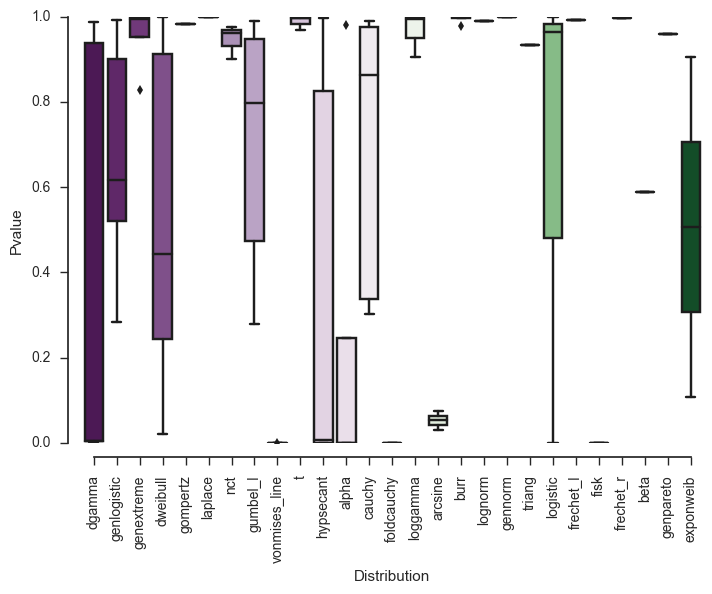

In [113]:
ax = sns.boxplot(x="Distribution", y="Pvalue", data=results_normalized, palette="PRGn")
sns.despine(offset=10, trim=True)
set_tick_label_rotations(ax)

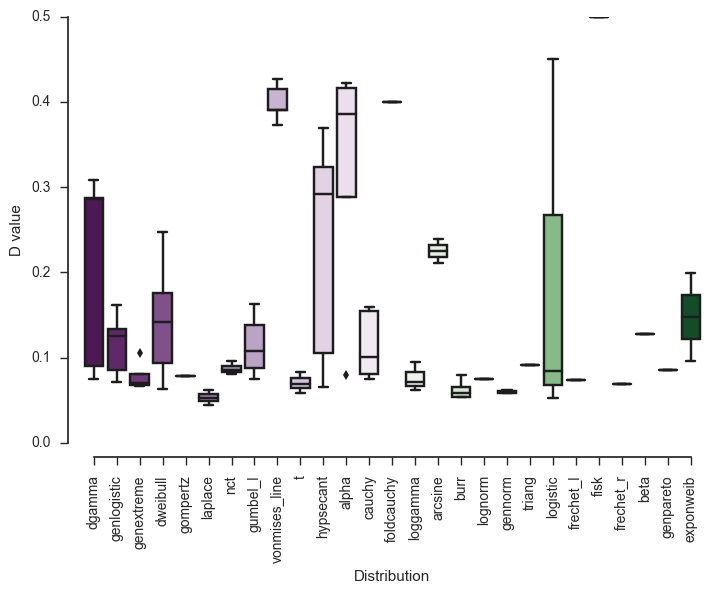

In [114]:
ax = sns.boxplot(x="Distribution", y="D value", data=results_normalized, palette="PRGn")
sns.despine(offset=10, trim=True)
set_tick_label_rotations(ax)

In [108]:
arr, _ = scipy.stats.boxcox([   34.01,   294.21,    25.5 ,   243.46,   254.47,   142.92,
         108.51,  1059.35,   505.02,   342.78,   120.07,    64.58,
         301.08  ,   183.37,   305.11,   578.9 ,  1441.66,
        1198.84,   121.06,  1229.84,  1052.43,   362.83,   312.37,
         717.01,  2201.6 ,  2567.7 ,   989.01,   966.98,  1877.24,
         182.3 ,  2694.3 ,   776.26,   710.76,   940.77,   857.24])
print arr

[  5.13694406  10.63565141   4.56767155  10.05189682  10.18627644
   8.52417496   7.79619158  15.22834108  12.42924884  11.12323581
   8.05906258   6.52969911  10.70835031   9.21857927  10.75038172
  12.91422799  16.5213529   15.73778353   8.08062106  15.8445145
  15.20170256  11.30850005  10.82499486  13.70158543  18.43407602
  19.17040985  14.95081556  14.86065662  17.69483641   9.2018702
  19.40551306  14.0025042   13.66869758  14.7512286   14.38541838]


In [120]:
original = [  34.01,   294.21,    25.5 ,   243.46,   254.47,   142.92,
         108.51,  1059.35,   505.02,   342.78,   120.07,    64.58,
         301.08  ,   183.37,   305.11,   578.9 ,  1441.66,
        1198.84,   121.06,  1229.84,  1052.43,   362.83,   312.37,
         717.01,  2201.6 ,  2567.7 ,   989.01,   966.98,  1877.24,
         182.3 ,  2694.3 ,   776.26,   710.76,   940.77,   857.24];

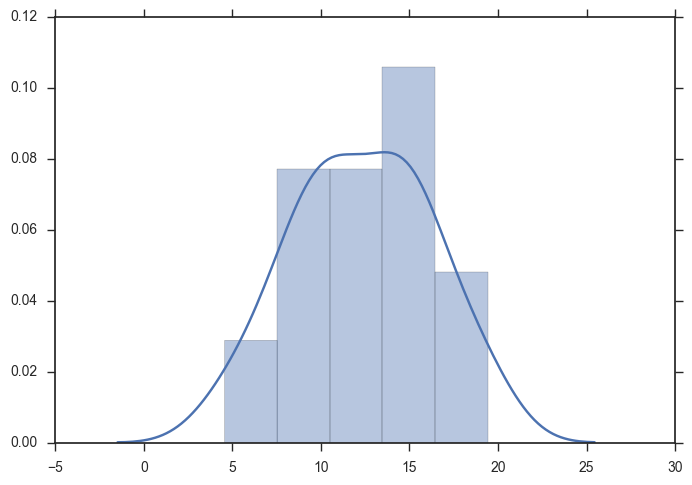

In [109]:
sns.distplot(arr)

In [115]:
print results_normalized

             Sample   Distribution        Pvalue   D value
0         LPS_IFNa2         dgamma  4.796240e-03  0.286988
1          LPS_IFNg    genlogistic  6.304055e-01  0.123923
2         LPS_IL-10     genextreme  9.930985e-01  0.072294
3      LPS_IL-12p40       dweibull  9.559348e-01  0.086500
4      LPS_IL-12p70       dweibull  3.123580e-01  0.158213
5         LPS_IL-1b       gompertz  9.818020e-01  0.078709
6         LPS_IL-23     genextreme  9.977509e-01  0.066597
7          LPS_IL-6        laplace  9.993473e-01  0.061693
8          LPS_IL-8            nct  9.019896e-01  0.096252
9         LPS_IP-10       gumbel_l  9.723267e-01  0.082109
10          LPS_MDC  vonmises_line  2.479595e-05  0.391024
11       LPS_MIP-1a              t  9.960166e-01  0.069318
12       LPS_MIP-1b              t  9.694300e-01  0.082989
13         LPS_TNFa      hypsecant  9.979621e-01  0.066160
14        MDP_IFNa2      hypsecant  8.466216e-05  0.369664
15         MDP_IFNg          alpha  5.667108e-06  0.4150

In [117]:
import statsmodels.api as sm
import pylab

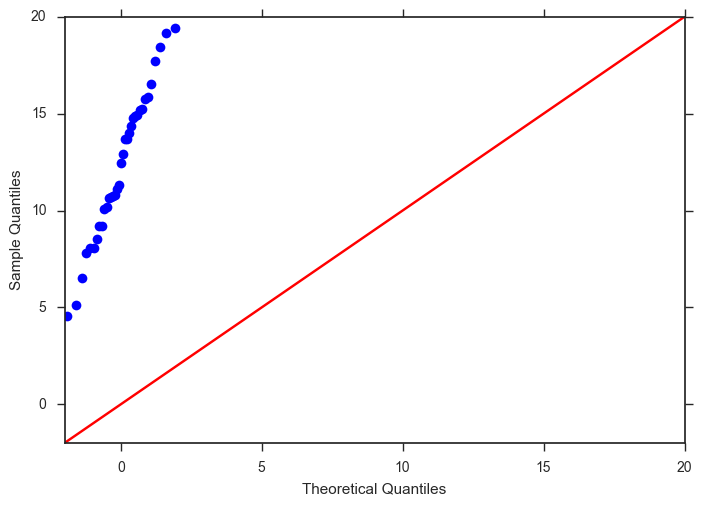

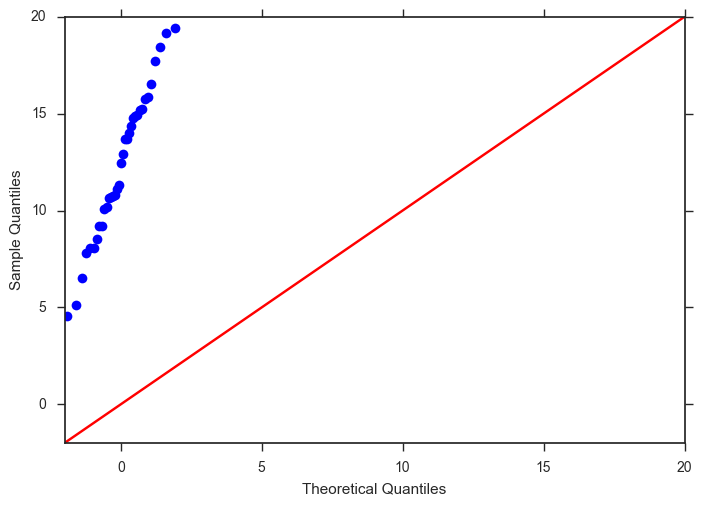

In [130]:
sm.qqplot(arr, line='45')